# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Victor\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv("keys.env")
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
from newsapi.newsapi_client import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q = "bitcoin", language = "en")

In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q = "ethereum", language = "en")

In [6]:
def create_df(news):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [7]:
bitcoin_df = create_df(bitcoin_headlines["articles"])
ethereum_df = create_df(ethereum_headlines["articles"])

In [8]:
def build_sent_score(df):
    title_sent = {
        "title_compound": [],
        "title_pos": [],
        "title_neu": [],
        "title_neg": []
    }
    text_sent = {
        "text_compound": [],
        "text_pos": [],
        "text_neu": [],
        "text_neg": []
    }

    # Get sentiment for the text and the title
    for index, row in df.iterrows():
        try:
            # Sentiment scoring with VADER
            title_sentiment = analyzer.polarity_scores(row["title"])
            title_sent["title_compound"].append(title_sentiment["compound"])
            title_sent["title_pos"].append(title_sentiment["pos"])
            title_sent["title_neu"].append(title_sentiment["neu"])
            title_sent["title_neg"].append(title_sentiment["neg"])
            
            if(row["text"] != None):
                text_sentiment = analyzer.polarity_scores(row["text"])
                text_sent["text_compound"].append(text_sentiment["compound"])
                text_sent["text_pos"].append(text_sentiment["pos"])
                text_sent["text_neu"].append(text_sentiment["neu"])
                text_sent["text_neg"].append(text_sentiment["neg"])
            else:
                text_sent["text_compound"].append(0)
                text_sent["text_pos"].append(0)
                text_sent["text_neu"].append(0)
                text_sent["text_neg"].append(0)
        except AttributeError:
            pass

    # Attaching sentiment columns to the News DataFrame
    title_sentiment_df = pd.DataFrame(title_sent)
    text_sentiment_df = pd.DataFrame(text_sent)
    new_df = df.join(title_sentiment_df).join(text_sentiment_df)

    return new_df

In [9]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sent = build_sent_score(bitcoin_df)
bitcoin_sent.head()

,title,description,text,date,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg
0,India will reportedly introduce bill to make o...,India’s legislature is reportedly considering ...,One of the strictest crackdowns worldwide\r\nP...,2021-03-15,-0.5574,0.000,0.714,0.286,-0.5574,0.000,0.890,0.11
1,Is Bitcoin a safe bet?,The digital cryptocurrency Bitcoin has tripled...,None,2021-02-20,0.4404,0.492,0.508,0.000,0.0000,0.000,0.000,0.00
2,Coinbase says unmasking Satoshi Nakamoto might...,Some things are best left a mystery — at least...,Some things are best left a mystery at least a...,2021-02-26,-0.5423,0.000,0.696,0.304,0.6369,0.113,0.887,0.00
3,How bitcoin is like a teenager,With the value of bitcoin in the market toppin...,None,2021-02-21,0.3612,0.385,0.615,0.000,0.0000,0.000,0.000,0.00
4,Why bitcoin could triple over next year,"William Quigley, managing director of Magnetic...",,2021-03-03,0.0000,0.000,1.000,0.000,0.0000,0.000,0.000,0.00


In [10]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sent = build_sent_score(ethereum_df)
ethereum_sent.head()

,title,description,text,date,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg
0,The climate controversy swirling around NFTs,"Most NFTs are bought and sold with Ethereum, a...",Famed auction house Christies just sold its fi...,2021-03-15,0.0000,0.000,1.000,0.000,0.0000,0.000,1.000,0.000
1,India will reportedly introduce bill to make o...,India’s legislature is reportedly considering ...,One of the strictest crackdowns worldwide\r\nP...,2021-03-15,-0.5574,0.000,0.714,0.286,-0.5574,0.000,0.890,0.110
2,NVIDIA limits RTX 3060 crypto speeds as it int...,Worried that the GeForce RTX 3060 will be sold...,Worried that the GeForce RTX 3060 will be sold...,2021-02-18,0.0000,0.000,1.000,0.000,-0.3400,0.063,0.818,0.119
3,"A beginner's guide to NFTs, the crypto potenti...",Here's everything you need to know about non-f...,Here's everything you need to know about non-f...,2021-03-16,0.2263,0.192,0.808,0.000,-0.1531,0.000,0.938,0.062
4,What are NFTs? Everything you need to know.,NFTs are the latest cryptocurrency rage these ...,NFTs are the latest cryptocurrency rage these ...,2021-03-06,0.0000,0.000,1.000,0.000,-0.4588,0.066,0.789,0.145


In [11]:
# Describe the Bitcoin Sentiment
bitcoin_sent.describe()

,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,0.001355,0.102400,0.837550,0.060050,0.177590,0.056700,0.77960,0.013750
std,0.347880,0.167874,0.165275,0.109908,0.379035,0.070933,0.34236,0.034216
min,-0.557400,0.000000,0.508000,0.000000,-0.557400,0.000000,0.00000,0.000000
25%,-0.110100,0.000000,0.709500,0.000000,0.000000,0.000000,0.85075,0.000000
50%,0.000000,0.000000,0.816500,0.000000,0.000000,0.021000,0.90100,0.000000
75%,0.323650,0.233000,1.000000,0.041750,0.480150,0.094250,0.96850,0.000000
max,0.585900,0.492000,1.000000,0.304000,0.831600,0.246000,1.00000,0.110000


In [12]:
# Describe the Ethereum Sentiment
ethereum_sent.describe()

,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg
count,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.070350,0.05140,0.851950,0.096650,0.141160,0.064100,0.903950,0.031950
std,0.317344,0.11736,0.173349,0.155574,0.384852,0.051219,0.062568,0.048716
min,-0.709600,0.00000,0.526000,0.000000,-0.557400,0.000000,0.789000,0.000000
25%,-0.146575,0.00000,0.709500,0.000000,-0.038275,0.000000,0.861750,0.000000
50%,0.000000,0.00000,0.935000,0.000000,0.160900,0.068500,0.909000,0.000000
75%,0.000000,0.00000,1.000000,0.143750,0.440400,0.096250,0.938250,0.064500
max,0.718400,0.42900,1.000000,0.474000,0.709600,0.144000,1.000000,0.145000


### Questions:

Q: Which coin had the highest mean positive score?

A: Based on headlines (titles), Bitcoin has the highest mean positive sentiment score (0.102 vs 0.055), but based on body text, Ethereum has the higher mean positive score (0.076 vs 0.057).

Q: Which coin had the highest compound score?

A: Based on headlines, Bitcoin has the highest mean compound score (0.001 vs -0.052), but based on body, Ethereum has the highest mean compound score (0.190 vs 0.178).

Q. Which coin had the highest negative score?

A: Based on both headlines (0.097 vs 0.06) and body (0.029 vs 0.014), Ethereum has the highest mean negative score.



---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {"reuters", "ha", "stafffile", "photo", "poster", "pr", "cnw", "one", "according"} 

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    return output

In [16]:
def build_tokens(df):
    tokens = {
        "tokens": []
    }

    # Get sentiment for the text 
    for index, row in df.iterrows():
        try:            
            if(row["text"] != None):
                tokens["tokens"].append(tokenizer(row["text"]))
            else:
                tokens["tokens"].append("")
        except AttributeError:
            pass

    # Attaching sentiment columns to the News DataFrame
    tokens_df = pd.DataFrame(tokens)
    new_df = df.join(tokens_df)

    return new_df

In [17]:
# Create a new tokens column for Bitcoin
bitcoin_token_df = build_tokens(bitcoin_sent)

In [18]:
# Create a new tokens column for Ethereum
ethereum_token_df = build_tokens(ethereum_sent)

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
def bigram_counter(string): 
    processed = tokenizer(string)
    bigrams = ngrams(processed, n=2)
    top_20 = dict(Counter(bigrams).most_common(20))
    return pd.DataFrame(list(top_20.items()), columns=['bigram', 'count'])

In [21]:
# Generate the Bitcoin N-grams where N=2
bitcoin_str = str(list(bitcoin_token_df["tokens"]))
bigram_counter(bitcoin_str)

,bigram,count
0,"(cryptocurrency, exchange)",2
1,"(alltime, high)",2
2,"(elon, musk)",2
3,"(get, char)",2
4,"(investment, giveaway)",2
5,"(virtual, currency)",2
6,"(illustration, taken)",2
7,"(strictest, crackdown)",1
8,"(crackdown, worldwidephoto)",1
9,"(worldwidephoto, michele)",1


In [22]:
# Generate the Ethereum N-grams where N=2
ethereum_str = str(list(ethereum_token_df["tokens"]))
bigram_counter(ethereum_str)

,bigram,count
0,"(nonfungible, token)",3
1,"(record, high)",3
2,"(cryptocurrency, miner)",2
3,"(latest, cryptocurrency)",2
4,"(char, nfts)",2
5,"(char, new)",2
6,"(new, york)",2
7,"(ethereum, second)",2
8,"(second, largest)",2
9,"(largest, cryptocurrency)",2


In [23]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [24]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_processed = tokenizer(bitcoin_str)
print(dict(token_count(bitcoin_processed, 10)))

{'char': 17, 'bitcoin': 9, 'cryptocurrency': 5, 'new': 4, 'exchange': 3, 'morning': 3, 'high': 3, 'investment': 3, 'trading': 3, 'market': 3}


In [25]:
# Use token_count to get the top 10 words for Ethereum
ethereum_processed = tokenizer(ethereum_str)
print(dict(token_count(ethereum_processed, 10)))

{'char': 19, 'cryptocurrency': 10, 'ethereum': 7, 'new': 6, 'digital': 5, 'week': 5, 'token': 4, 'nfts': 4, 'company': 4, 'high': 4}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

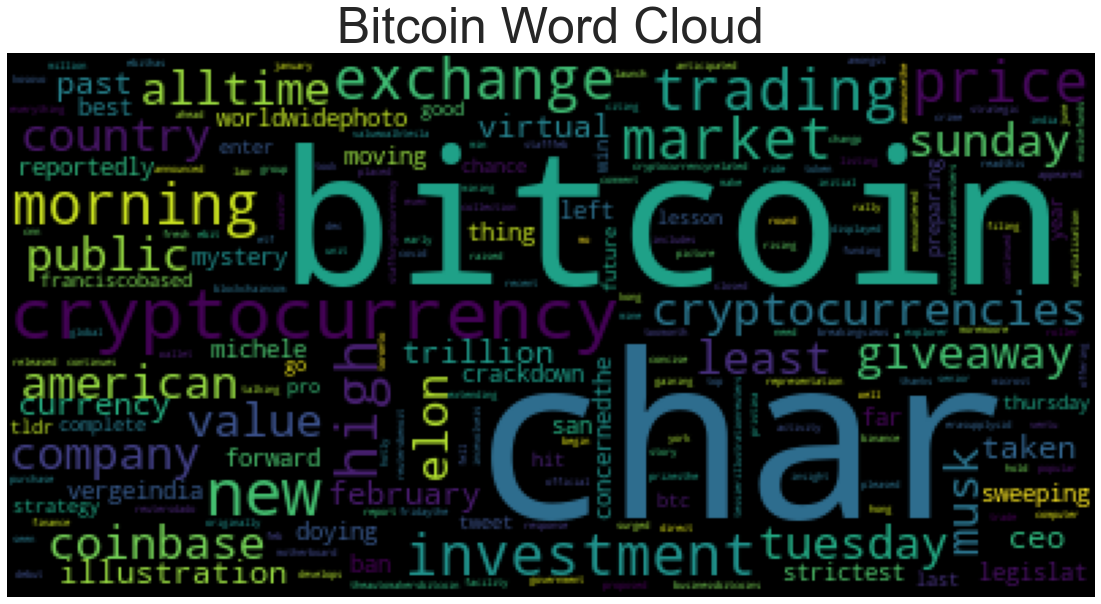

In [27]:
# Generate the Bitcoin word cloud
bitcoin_wc_str = ' '.join(bitcoin_processed)
bitcoin_wc = WordCloud().generate(bitcoin_wc_str)
plt.imshow(bitcoin_wc)
plt.axis("off")
plt.title("Bitcoin Word Cloud", fontsize = 50)
plt.show()

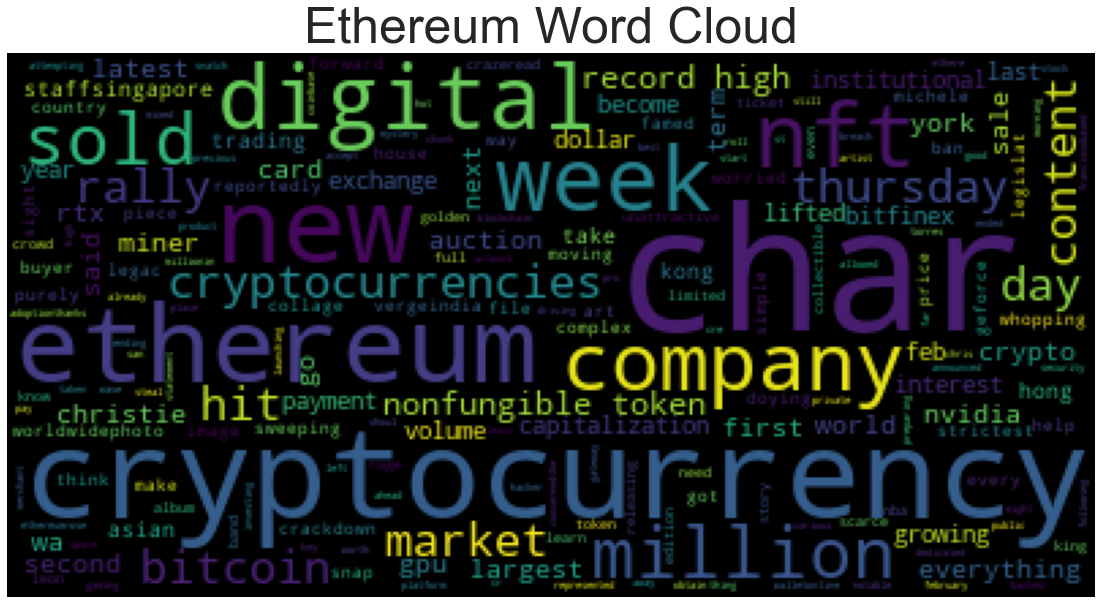

In [28]:
# Generate the Ethereum word cloud
ethereum_wc_str = ' '.join(ethereum_processed)
ethereum_wc = WordCloud().generate(ethereum_wc_str)
plt.imshow(ethereum_wc)
plt.axis("off")
plt.title("Ethereum Word Cloud", fontsize = 50)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [29]:
import spacy
from spacy import displacy

In [30]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [31]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [138]:
# Concatenate all of the Bitcoin text together
bitcoin_doc = ""
for i in range(0, len(bitcoin_df)):
    bitcoin_doc += str(bitcoin_df.text[i])

In [142]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(bitcoin_doc)

# Add a title to the document
bitcoin_ner.user_data["title"] = "Bitcoin NER Analysis"

In [143]:
# Render the visualization
displacy.render(bitcoin_ner, style = 'ent')

In [151]:
# List all Entities
bitcoin_entities = [ent.text for ent in bitcoin_ner.ents]
bitcoin_entities

['One',
 'Photo',
 'Michele Doying',
 'India',
 'Reuters',
 'Coinbase',
 'San Francisco',
 'last year',
 'Thursday',
 'this morning',
 'over $50,000',
 'over $12,000',
 'India',
 'Reuters',
 'CNN',
 'above $58,000',
 'Sunday',
 'just above $46,000',
 'Tuesday',
 'chars]Blockchain.com',
 '$120 million',
 'Moore Strategic Ventu',
 'chars]This morning',
 'Coinbase',
 'American',
 '19, 2021',
 'Elon Musk',
 'Binance',
 'Changp',
 'Reuters',
 'Dec. 8, 2017',
 'Benoit Tessier/Illustration',
 'Reuters',
 'Reuters',
 'Bitcoin',
 'January 21, 2021',
 'Reuters',
 'Reuters',
 'Feb 21',
 'Reuters',
 'Sunday',
 'two-month',
 '$1 trillion',
 'Friday',
 'Reuters',
 'Pristina',
 'Kosovo',
 'June 12, 2018',
 'HONG KONG',
 'Reuters Breakingviews',
 'Feb. 19, 2021',
 'Evolve',
 'week of February',
 'North American',
 '4',
 'Bitcoin',
 'past $56,000',
 'Friday',
 '$1 trillion',
 '7',
 'one',
 'above $50,000',
 'Tuesday',
 'morning',
 'noon',
 'Eastern Time',
 'around $48,500',
 'Bitcoin']

---

### Ethereum NER

In [148]:
# Concatenate all of the Ethereum text together
ethereum_doc = ""
for i in range(0, len(ethereum_df)):
    ethereum_doc += str(ethereum_df.text[i])

In [149]:
# Run the NER processor on all of the text
ethereum_ner = nlp(ethereum_doc)

# Add a title to the document
ethereum_ner.user_data["title"] = "Ethereum NER Analysis"

In [150]:
# Render the visualization
displacy.render(ethereum_ner, style = 'ent')

In [152]:
# List all Entities
ethereum_entities = [ent.text for ent in ethereum_ner.ents]
ethereum_entities

['Christies',
 'first',
 '$69 million',
 '5,000',
 'Photo',
 'Michele Doying',
 'India',
 'Reuters',
 'GeForce',
 '3060',
 'GPU',
 'these days',
 'Kings',
 'NBA',
 'millions',
 'Ethereum',
 'first',
 "Christie's",
 'NFT',
 'a few days',
 'Chris Torres',
 '3060',
 'GPU',
 'next week',
 'Nvidia',
 'this morning',
 'about $5.7 million',
 'chars]NEW YORK',
 'Reuters',
 'second',
 'Thursday',
 'chars]NEW YORK',
 'Feb 18',
 'Reuters',
 'second',
 'Thursday',
 '7.34%',
 'the week ending 21st February',
 '11.65%',
 'the previous week',
 'Ethereum ended',
 'the week',
 '1,935.57',
 'the week',
 'Coinbase',
 'San Francisco',
 'last year',
 'Thursday',
 'Bitfinex',
 'Bitfinex',
 'millions of dollars',
 'Reuters',
 'SINGAPORE',
 'Reuters',
 'Asian',
 'Saturday',
 'two-month',
 '$1 trillion',
 'a day earlier',
 'World FX',
 'Kevin Buckland',
 'Reuters',
 'Meitu',
 'Hong Kong',
 'China',
 'March 24, 2017',
 'Bobby Yip',
 'HONG KONG',
 'Reuters',
 'Hong Ko',
 'Reuters',
 'SINGAPORE',
 'Feb 15',
 'Reu

---